<a href="https://colab.research.google.com/github/dljaimes/Cuestionario-Creydty/blob/dljaimes-patch-1/Prueba_Andes_DENIS_LEONARDO_JAIMES_CAMPOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('StudentsPerformance.csv')

## **1. Análisis Descriptivo de la información: Análisi exploratorio de Datos**

In [ ]:
plt.style.use('ggplot')

Text(0.5, 1.0, 'Validación de valores nulos por variable')

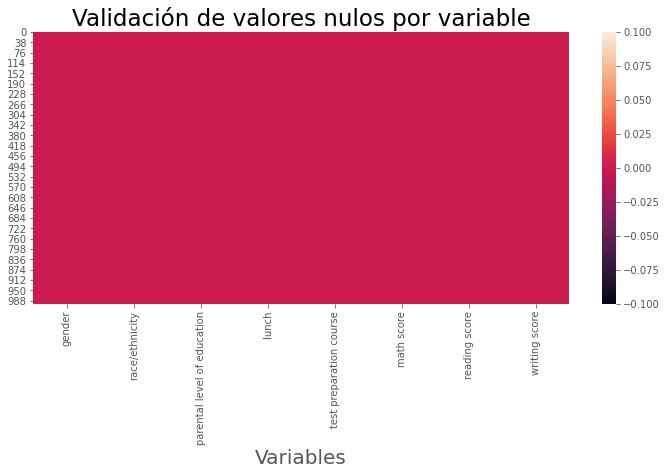

In [ ]:
# Identificación de valores nulos:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull())
plt.xlabel('Variables', fontsize=20)
plt.title('Validación de valores nulos por variable', fontsize=23)

Se observa que ninguna variable prsenta valores nulos por lo que no se requiere algún tipo de ajuste en dicho aspecto.

La distribución de estudiantes por género es:
female    0.518
male      0.482
Name: gender, dtype: float64
____________________________________________________________________________________________________


Text(0.5, 1.0, 'CANTIDAD DE ESTUDIANTES POR GÉNERO')

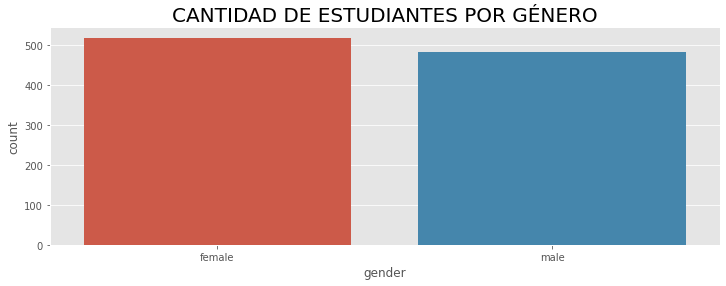

In [ ]:
#Se realiza una revisión de variable por variable iniciando con la variable de GÉNERO DE LOS ESTUDIANTES:
print('La distribución de estudiantes por género es:')
print(df['gender'].value_counts(normalize=True))
print('_____'*20)
plt.style.use('ggplot')
plt.figure(figsize=(12,4))
sns.countplot(df['gender'])
plt.title('CANTIDAD DE ESTUDIANTES POR GÉNERO', fontsize=20)

array([319, 262, 190, 140,  89])

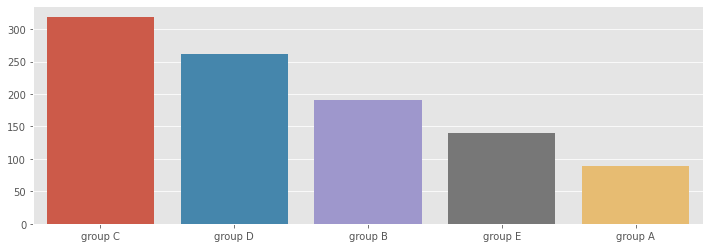

In [ ]:
plt.figure(figsize=(12,4))

sns.barplot(x=df['race/ethnicity'].value_counts().to_frame().index, y=df['race/ethnicity'].value_counts().to_frame()['race/ethnicity'].values )

La distribución de estudiantes por raza/grupo étnico es:
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64
____________________________________________________________________________________________________


Text(0.5, 1.0, 'CANTIDAD DE ESTUDIANTES POR GRUPO ÉTNICO/RAZA')

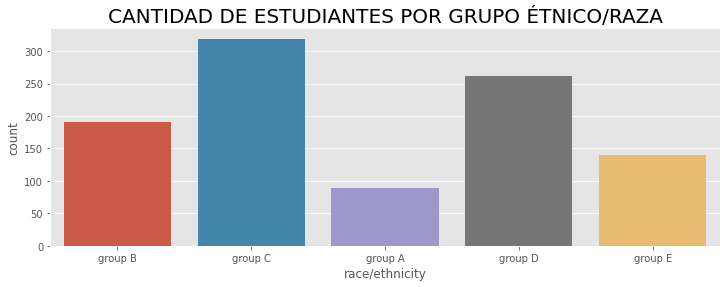

In [ ]:
# VARIABLE: GRUPO ÉTNICO:
print('La distribución de estudiantes por raza/grupo étnico es:')
print(df['race/ethnicity'].value_counts(normalize=True))
print('_____'*20)
plt.style.use('ggplot')
plt.figure(figsize=(12,4))
sns.countplot(df['race/ethnicity'])
plt.title('CANTIDAD DE ESTUDIANTES POR GRUPO ÉTNICO/RAZA', fontsize=20)

La distribución de estudiantes por Nivel de educación es:
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64
____________________________________________________________________________________________________


'parental level of education'

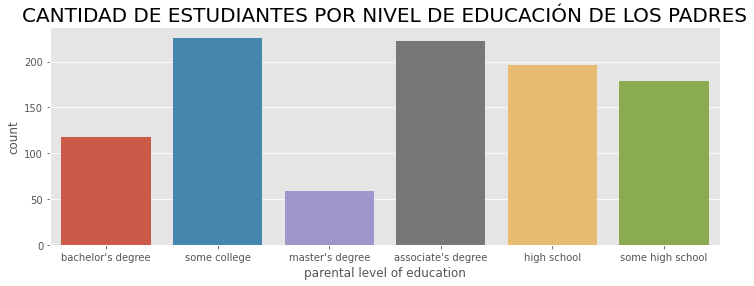

In [ ]:
# VARIABLE: NIVEL DE EDUCACIÓN:

print('La distribución de estudiantes por Nivel de educación es:')
print(df['parental level of education'].value_counts(normalize=True))
print('_____'*20)
plt.style.use('ggplot')
plt.figure(figsize=(12,4))
sns.countplot(df['parental level of education'])
plt.title('CANTIDAD DE ESTUDIANTES POR NIVEL DE EDUCACIÓN DE LOS PADRES', fontsize=20)



'parental level of education'

## **2. Análisis de normalidad de los puntales obtenidos**

In [ ]:
# Calculo de los valores promedio de cada prueba:

pruebas= ['math score'	,'reading score',	'writing score']

for i in pruebas:
  print( 'El promedio de la prueba: ',i , 'es:', df[i].mean())
  print( 'La moda de la prueba: ', i , 'es: ', df[i].mode()   )
  print( 'La mediana de la prueba: ', i , 'es: ', df[i].median()   )
  print('---'*30)

El promedio de la prueba:  math score es: 66.089
La moda de la prueba:  math score es:  0    65
dtype: int64
La mediana de la prueba:  math score es:  66.0
------------------------------------------------------------------------------------------
El promedio de la prueba:  reading score es: 69.169
La moda de la prueba:  reading score es:  0    72
dtype: int64
La mediana de la prueba:  reading score es:  70.0
------------------------------------------------------------------------------------------
El promedio de la prueba:  writing score es: 68.054
La moda de la prueba:  writing score es:  0    74
dtype: int64
La mediana de la prueba:  writing score es:  69.0
------------------------------------------------------------------------------------------


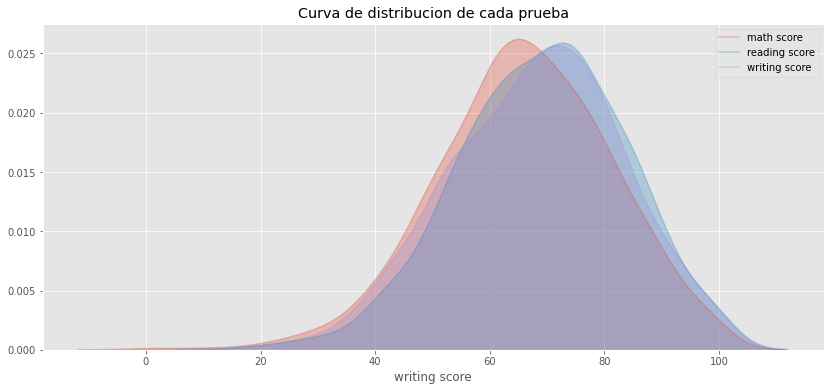

In [ ]:


plt.figure(figsize=(14,6))
for i in pruebas:
  sns.distplot(df[i], label=i, hist=False, kde_kws={'shade':True, 'alpha':.3})
  plt.title('Curva de distribucion de cada prueba')

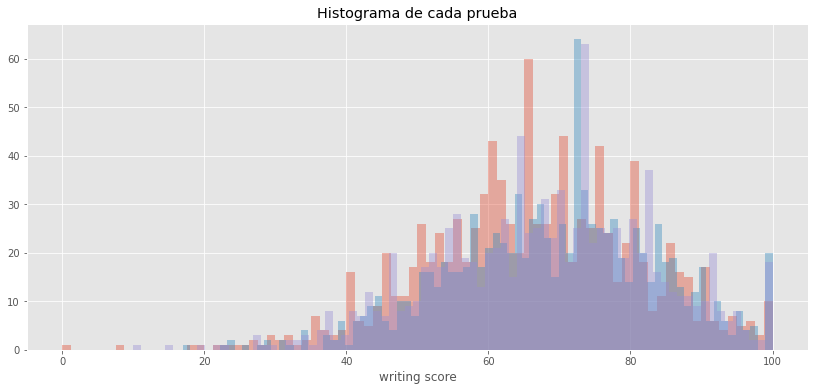

In [ ]:
#Al ver en detalle la distribución de cada prueba se observa que su comportamiento no es tan 'Normal':

plt.figure(figsize=(14,6))
for i in pruebas:
  sns.distplot(df[i], label=i, hist=True, kde=False, bins=80)
  plt.title('Histograma de cada prueba')

Bisualmente se puede apreciar que la distribución de cada prueba sigue un comportamiento 'Normal'.

Sin embargo, igualmente se realiza una prueba de bondad de ajuste para confirmar esta suposición.

In [ ]:
from scipy import stats

In [ ]:
# Se hace uso de la librería de Scipy para realizar una prueba de 'Shapiro-Wilk' extrayendo los p-values ara cada prueba de hipotesis
# en donde la hipotesis nula es que cada prueba sigue una distribucion normal.
for i in pruebas:
  print(stats.shapiro(df[i]))

(0.9931508302688599, 0.0001453401637263596)
(0.9929210543632507, 0.0001056220498867333)
(0.9919633269309998, 2.9172901122365147e-05)


Se observa que para todas las pruebas el p-value (el segundo valor) es menor a 0.05. **Esto se traduce en que ninguna de las pruebas se comporta de manera normal.**

## **3. Identificaicón de los estudiantes admitidos**

In [ ]:
df['Pasó la prueba-writing'] = df['writing score'].apply(lambda x: 1 if x >= 80 else 0)
df['Pasó la prueba-reading'] = df['reading score'].apply(lambda x: 1 if x >= 80 else 0)
df['Pasó la prueba-math'] = df['math score'].apply(lambda x: 1 if x >= 80 else 0)

In [ ]:
df['Suma de pasar las pruebas'] = df['Pasó la prueba-writing'] + df['Pasó la prueba-reading'] + df['Pasó la prueba-math']

In [ ]:
df['Promedio de las pruebas'] = (df['math score'] + df['reading score'] + df['writing score'])/3

In [ ]:
df['¿Aprobó el exámen?'] = np.where((df['Promedio de las pruebas'] >= 75) | (df['Suma de pasar las pruebas']>=2), 'Si', 'No')

In [ ]:
# Cantida de estudiantes que aprobaron el exámen:

df['¿Aprobó el exámen?'].value_counts()

No    674
Si    326
Name: ¿Aprobó el exámen?, dtype: int64

In [ ]:
df_admitidos = df[df['¿Aprobó el exámen?']=='Si']

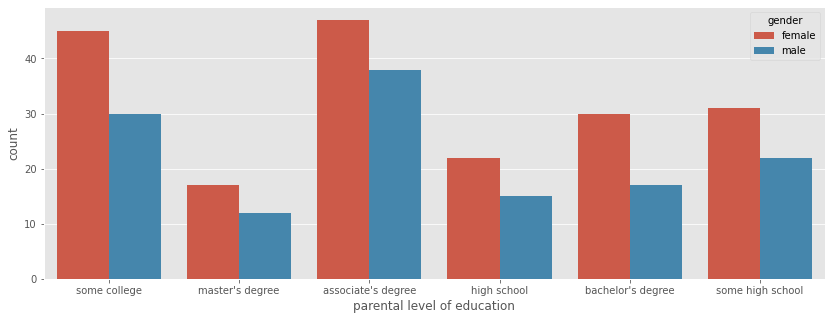

In [ ]:
# Análisis detallado de los admitidos:

plt.figure(figsize=(14,5))
sns.countplot(df_admitidos['parental level of education'], hue=df_admitidos['gender'] )

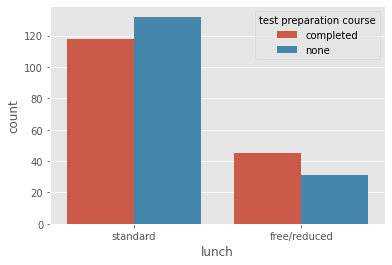

In [ ]:
#df_admitidos.groupby(by=['gender', 'parental level of education','race/ethnicity']).agg('count')
sns.countplot(df_admitidos['lunch'], hue=df_admitidos['test preparation course'])

In [ ]:
df_admitidos['gender'].value_counts()

female    192
male      134
Name: gender, dtype: int64

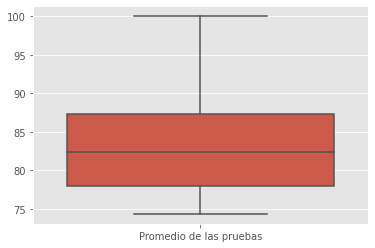

In [ ]:
sns.boxplot(data=df_admitidos[['Promedio de las pruebas','gender']])#, x='Promedio de las pruebas',  hue='gender')

In [ ]:
df_admitidos[['Promedio de las pruebas','gender']].groupby(by='gender').describe()

Promedio de las pruebas             ...                  
                         count       mean  ...        75%    max
gender                                     ...                  
female                   192.0  83.815972  ...  88.416667  100.0
male                     134.0  82.345771  ...  85.916667  100.0

[2 rows x 8 columns]

In [ ]:
df_admitidos[['Promedio de las pruebas','parental level of education']].groupby(by='parental level of education').describe()

Promedio de las pruebas  ...            
                                              count  ...         max
parental level of education                          ...            
associate's degree                             85.0  ...  100.000000
bachelor's degree                              47.0  ...  100.000000
high school                                    37.0  ...   95.666667
master's degree                                29.0  ...   97.666667
some college                                   75.0  ...   99.000000
some high school                               53.0  ...   99.000000

[6 rows x 8 columns]

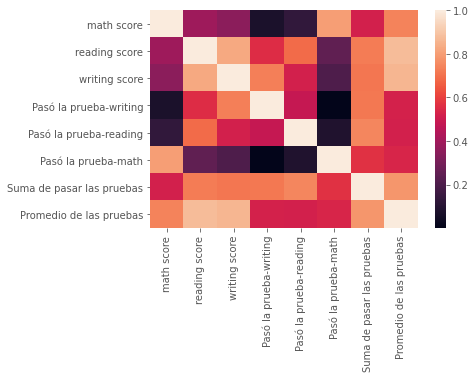

In [ ]:
sns.heatmap(df_admitidos.corr())

## 4. Proporción de hombres admitidos vs mujeres admitidas

In [ ]:
df['Valor']=1

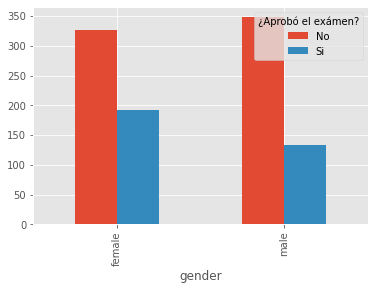

In [ ]:
pd.pivot_table(data=df[['gender', '¿Aprobó el exámen?', 'Valor']], index='gender', columns='¿Aprobó el exámen?', aggfunc='count', values='Valor').plot(kind='bar')

5. Preparación para el exámen:

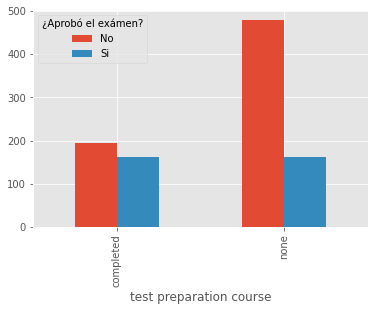

In [ ]:
pd.pivot_table(data=df[['test preparation course', '¿Aprobó el exámen?', 'Valor']], index='test preparation course', columns='¿Aprobó el exámen?', aggfunc='count', values='Valor').plot(kind='bar')

In [ ]:
dummies = pd.get_dummies(df['test preparation course'])

In [ ]:
df = pd.concat([df, dummies],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = dummies
Y = df['¿Aprobó el exámen?']

In [ ]:
modelo = LogisticRegression()

In [ ]:
modelo.fit()

In [ ]:
import statsmodels.api as sm


In [ ]:
datos = pd.concat([X,Y], axis=1)

In [ ]:
datos.replace(['Si', 'No'], [1,0], inplace=True)

In [ ]:
datos.corr()

,completed,none,¿Aprobó el exámen?
completed,1.000000,-1.000000,0.205996
none,-1.000000,1.000000,-0.205996
¿Aprobó el exámen?,0.205996,-0.205996,1.000000


In [ ]:
logit_model=sm.Logit(pd.to_numeric(X['completed']),Y.replace(['Si','No'], [1,0]))

In [ ]:
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.693147
         Iterations 1
                         Results: Logit
Model:              Logit            Pseudo R-squared: inf      
Dependent Variable: completed        AIC:              1388.2944
Date:               2020-07-01 02:28 BIC:              1393.2021
No. Observations:   1000             Log-Likelihood:   -693.15  
Df Model:           0                LL-Null:          0.0000   
Df Residuals:       999              LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     1.0000                                      
----------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
¿Aprobó el exámen?  0.0000   0.1108 0.0000 1.0000 -0.2171 0.2171



/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/discrete/discrete_model.py:3390: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull
